<a href="https://colab.research.google.com/github/anshikapanwar0/Entertainer-Data-Analytics/blob/main/EntertainerDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

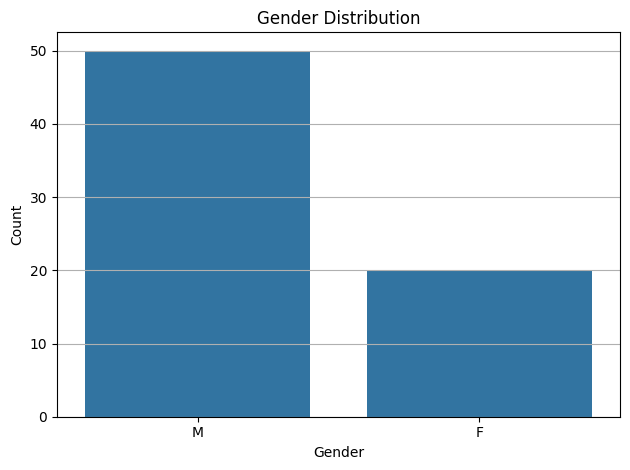

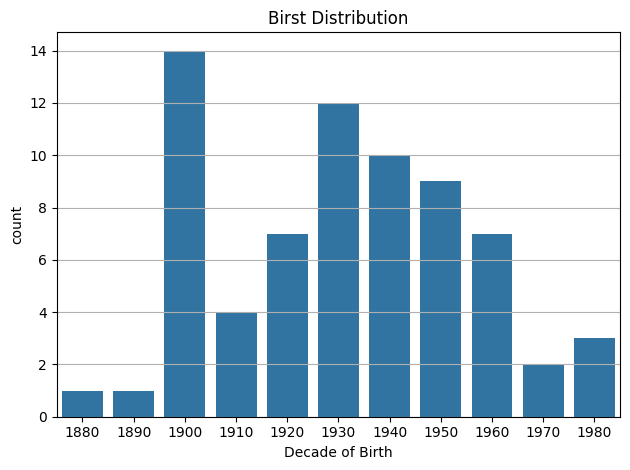

In [30]:
# Basic Info

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data1= pd.read_csv('/content/Entertainer - Basic Info.csv')
data1['Entertainer']=data1['Entertainer'].str.title()
data1.head()

#Gender Distribution
gender_distribution = data1['Gender (traditional)'].value_counts()
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

#Birth Distribution
data1['Decade of Birth'] = (data1['Birth Year'] // 10) * 10
decade_distribution = data1['Decade of Birth'].value_counts().sort_index()
sns.barplot(x=decade_distribution.index, y=decade_distribution.values)
plt.title('Birst Distribution')
plt.xlabel('Decade of Birth')
plt.ylabel('count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

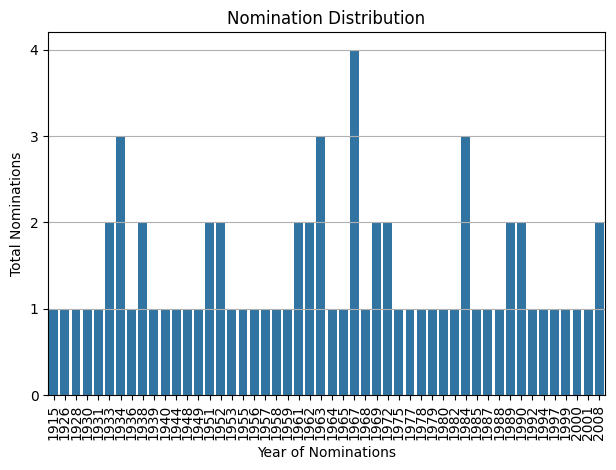

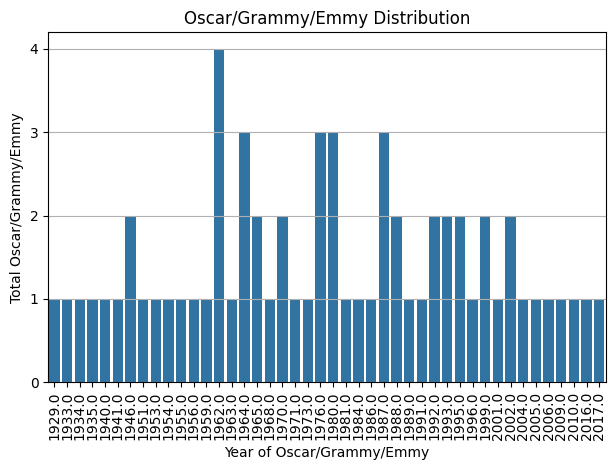

In [31]:
#BreakThrough Info

import numpy as np
data2= pd.read_csv('/content/Entertainer - Breakthrough Info.csv')
data2['Entertainer']=data2['Entertainer'].str.title()
data2['Breakthrough Name']=data2['Breakthrough Name'].str.title()
data2.head()

#Nomination Distribution
nomination_distribution= data2['Year of Breakthrough/#1 Hit/Award Nomination'].value_counts()
sns.barplot(x=nomination_distribution.index, y=nomination_distribution.values)
plt.title('Nomination Distribution')
plt.xlabel('Year of Nominations')
plt.ylabel('Total Nominations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True, axis='y')
y_max = nomination_distribution.max()
plt.yticks(np.arange(0, y_max + 1, 1))
plt.show()

#oscar Distribution
oscar_distribution= data2['Year of First Oscar/Grammy/Emmy'].value_counts()
sns.barplot(x=oscar_distribution.index, y=oscar_distribution.values)
plt.title('Oscar/Grammy/Emmy Distribution')
plt.xlabel('Year of Oscar/Grammy/Emmy')
plt.ylabel('Total Oscar/Grammy/Emmy')
plt.xticks(rotation=90)
plt.tight_layout()
y_max = nomination_distribution.max()
plt.yticks(np.arange(0, y_max + 1, 1))
plt.grid(True, axis='y')
plt.show()



In [32]:
# entertainers with nomination

df = pd.read_csv('/content/Entertainer - Breakthrough Info.csv')
df.columns = df.columns.str.strip()
no_nomination_entertainers = df[df['Year of Breakthrough/#1 Hit/Award Nomination'].notnull()]['Entertainer']
print("Entertainers who were nominated")
print(no_nomination_entertainers)

Entertainers who were nominated
0               Adele
1      Angelina Jolie
2     Aretha Franklin
3         Bette Davis
4         Betty White
           ...       
65          Tom Hanks
66       Tony Bennett
67       Wayne Newton
68         Will Smith
69      Willie Nelson
Name: Entertainer, Length: 70, dtype: object


In [33]:
# Entertainers with their years from first nomination to first award

data2.columns = data2.columns.str.strip()
data2['	Year of Breakthrough/#1 Hit/Award Nomination'] = pd.to_numeric(data2['Year of Breakthrough/#1 Hit/Award Nomination'], errors='coerce')
data2['Year of First Oscar/Grammy/Emmy'] = pd.to_numeric(data2['Year of First Oscar/Grammy/Emmy'], errors='coerce')
data2 = data2.dropna(subset=['	Year of Breakthrough/#1 Hit/Award Nomination', 'Year of First Oscar/Grammy/Emmy'])
data2['Years from Nomination to Award'] = data2['Year of First Oscar/Grammy/Emmy'] - data2['	Year of Breakthrough/#1 Hit/Award Nomination']
print("Entertainers with their years from first nomination to first award:")
print(data2[['Entertainer', '	Year of Breakthrough/#1 Hit/Award Nomination', 'Year of First Oscar/Grammy/Emmy', 'Years from Nomination to Award']])

Entertainers with their years from first nomination to first award:
        Entertainer  \tYear of Breakthrough/#1 Hit/Award Nomination  \
0             Adele                                            2008   
1    Angelina Jolie                                            1999   
2   Aretha Franklin                                            1967   
3       Bette Davis                                            1934   
4       Betty White                                            1952   
..              ...                                             ...   
64    Stevie Wonder                                            1963   
65        Tom Hanks                                            1984   
66     Tony Bennett                                            1951   
68       Will Smith                                            1990   
69    Willie Nelson                                            1975   

    Year of First Oscar/Grammy/Emmy  Years from Nomination to Award  
0        

<ipython-input-33-3d8eb40867d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Years from Nomination to Award'] = data2['Year of First Oscar/Grammy/Emmy'] - data2['	Year of Breakthrough/#1 Hit/Award Nomination']


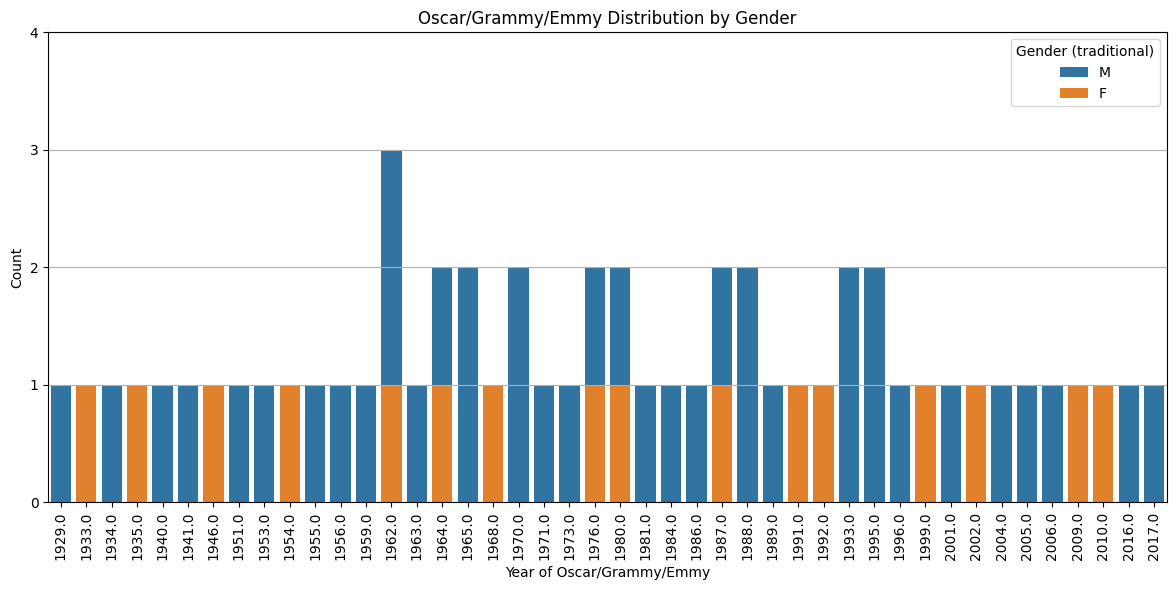

In [40]:
# Yearly Gender-Award Distribution

data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()
merged_df = pd.merge(data1, data2, on='Entertainer', how='inner')
merged_df['Year of First Oscar/Grammy/Emmy'] = pd.to_numeric(merged_df['Year of First Oscar/Grammy/Emmy'], errors='coerce')
merged_df = merged_df.dropna(subset=['Year of First Oscar/Grammy/Emmy', 'Gender (traditional)'])
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Year of First Oscar/Grammy/Emmy', hue='Gender (traditional)', dodge=False)
plt.title('Oscar/Grammy/Emmy Distribution by Gender')
plt.xlabel('Year of Oscar/Grammy/Emmy')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
y_max = merged_df['Year of First Oscar/Grammy/Emmy'].value_counts().max()
plt.yticks(range(0, y_max + 1))
plt.grid(True, axis='y')
plt.legend(title='Gender (traditional)', loc='upper right')
plt.show()

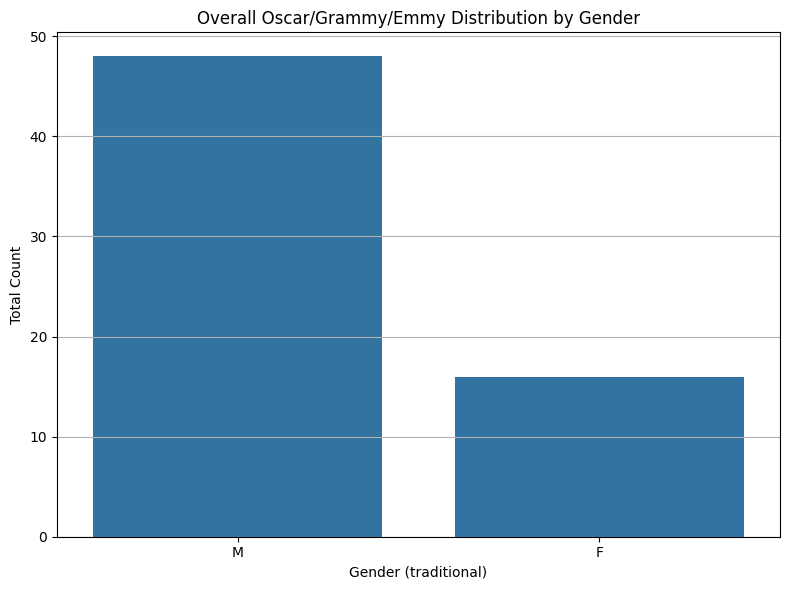

In [42]:
# Overall Gender-Awards Distribution

data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()
merged_df = pd.merge(data1, data2, on='Entertainer', how='inner')
merged_df['Year of First Oscar/Grammy/Emmy'] = pd.to_numeric(merged_df['Year of First Oscar/Grammy/Emmy'], errors='coerce')
merged_df = merged_df.dropna(subset=['Year of First Oscar/Grammy/Emmy', 'Gender (traditional)'])
gender_counts = merged_df['Gender (traditional)'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Overall Oscar/Grammy/Emmy Distribution by Gender')
plt.xlabel('Gender (traditional)')
plt.ylabel('Total Count')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

In [34]:
# Last Work Info

data3= pd.read_csv('/content/Entertainer - Last work Info.csv')
data3['Entertainer']=data3['Entertainer'].str.title()
data3.head()

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN


In [35]:
# Entertainers not with us anymore
#NOTE:- Analysis based on the provided data only

df = pd.read_csv('/content/Entertainer - Last work Info.csv')
df. columns = df.columns.str.strip()
not_with_us= df[df['Year of Death'].notnull()]['Entertainer']
print("Entertainers not with us anymore:")
print(not_with_us)

Entertainers not with us anymore:
3           Bette Davis
5           Bing Crosby
6              Bob Hope
8        Carole Lombard
9         Carrie Fisher
10           Cary Grant
11      Charlie Chaplin
12            Clara Bow
13          Clark Gable
15      Debbie Reynolds
20          Ed Sullivan
23        Elvis Presley
24        Frank Sinatra
26       George Michael
27         Gregory Peck
28          Greta Garbo
29      Humphrey Bogart
30           James Dean
35        Jimmy Stewart
36        Joan Crawford
37          John Lennon
38           John Wayne
39        Johnny Carson
42    Katherine Hepburn
46    Leonard Bernstein
48      Louis Armstrong
51        Marlon Brando
58          Paul Newman
59        Peter O'Toole
60               Prince
Name: Entertainer, dtype: object


In [36]:
# Entertainers with same last major work year and death year

df = pd.read_csv('/content/Entertainer - Last work Info.csv')
df.columns = df.columns.str.strip()
matching_years = df[df['Year of Last Major Work (arguable)'] == df['Year of Death']]
entertainers = matching_years['Entertainer']
print("Entertainers whose last major work year and year of death are the same:")
print(entertainers)

Entertainers whose last major work year and year of death are the same:
3        Bette Davis
8     Carole Lombard
9      Carrie Fisher
13       Clark Gable
23     Elvis Presley
30        James Dean
37       John Lennon
59     Peter O'Toole
60            Prince
Name: Entertainer, dtype: object


In [37]:
# Entertainer's age
# NOTE:- Age is calculated using the provided data only

from datetime import datetime
data1.columns = data1.columns.str.strip()
data3.columns = data3.columns.str.strip()
merged_df = pd.merge(data1, data3, on='Entertainer', how='inner')
merged_df['Birth Year'] = pd.to_numeric(merged_df['Birth Year'], errors='coerce')
merged_df['Year of Death'] = pd.to_numeric(merged_df['Year of Death'], errors='coerce')
current_year = datetime.now().year
merged_df['Age'] = merged_df.apply(
    lambda row: current_year - row['Birth Year'] if pd.isna(row['Year of Death']) else row['Year of Death'] - row['Birth Year'],
    axis=1
)
merged_df = merged_df.dropna(subset=['Birth Year'])
print("Entertainers with their calculated ages:")
print(merged_df[['Entertainer', 'Birth Year', 'Year of Death', 'Age']])


Entertainers with their calculated ages:
        Entertainer  Birth Year  Year of Death    Age
0             Adele        1988            NaN   36.0
1    Angelina Jolie        1975            NaN   49.0
2   Aretha Franklin        1942            NaN   82.0
3       Bette Davis        1908         1989.0   81.0
4       Betty White        1922            NaN  102.0
..              ...         ...            ...    ...
65        Tom Hanks        1956            NaN   68.0
66     Tony Bennett        1926            NaN   98.0
67     Wayne Newton        1942            NaN   82.0
68       Will Smith        1968            NaN   56.0
69    Willie Nelson        1933            NaN   91.0

[70 rows x 4 columns]


In [38]:
# Entertainer's age at First Award

data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()
merged_df = pd.merge(data1, data2, on='Entertainer', how='inner')
merged_df['Birth Year'] = pd.to_numeric(merged_df['Birth Year'], errors='coerce')
merged_df['Year of First Oscar/Grammy/Emmy'] = pd.to_numeric(merged_df['Year of First Oscar/Grammy/Emmy'], errors='coerce')
merged_df = merged_df.dropna(subset=['Birth Year', 'Year of First Oscar/Grammy/Emmy'])
merged_df['Age at First Award'] = merged_df['Year of First Oscar/Grammy/Emmy'] - merged_df['Birth Year']
print("Entertainers with their age at first Oscar/Grammy/Emmy:")
print(merged_df[['Entertainer', 'Birth Year', 'Year of First Oscar/Grammy/Emmy', 'Age at First Award']])


Entertainers with their age at first Oscar/Grammy/Emmy:
        Entertainer  Birth Year  Year of First Oscar/Grammy/Emmy  \
0             Adele        1988                           2009.0   
1    Angelina Jolie        1975                           1999.0   
2   Aretha Franklin        1942                           1968.0   
3       Bette Davis        1908                           1935.0   
4       Betty White        1922                           1976.0   
..              ...         ...                              ...   
59    Stevie Wonder        1950                           1973.0   
60        Tom Hanks        1956                           1993.0   
61     Tony Bennett        1926                           1963.0   
62       Will Smith        1968                           1988.0   
63    Willie Nelson        1933                           1976.0   

    Age at First Award  
0                 21.0  
1                 24.0  
2                 26.0  
3                 27.0  
4 